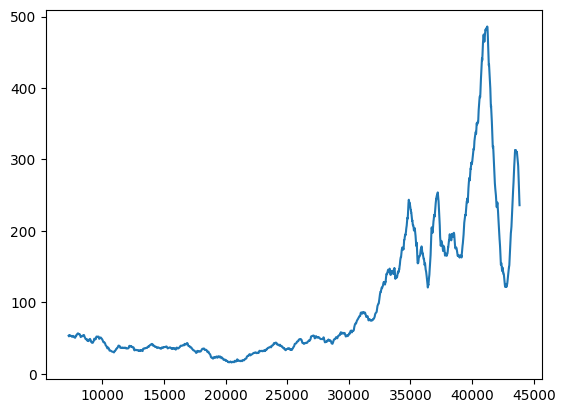

In [16]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

price_data = pd.read_json('../solar-rpa/price_data.json')
price_data['MA']=price_data['price'].rolling(window=24*30).mean().plot()

In [17]:

price_data.fillna(0)
price_data.iloc[:10000]
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Annahme: Der DataFrame `price_data` und seine 'price'-Spalte existieren bereits
# Umwandlung des Index in eine numerische Form (falls der Index ein Datum oder eine andere nicht-numerische Form ist)
# Hier nehmen wir an, dass der Index bereits eine numerische Sequenz ist oder direkt verwendet werden kann
index_as_number = np.array(price_data.index).reshape(-1, 1)

# Skalierung des Index und der 'price'-Daten
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_Y = MinMaxScaler(feature_range=(0, 1))

X_scaled = scaler_X.fit_transform(index_as_number)
y_scaled = scaler_Y.fit_transform(price_data['price'].values.reshape(-1, 1))

# Aufteilung der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=0)

# Erstellung des neuronalen Netzwerkmodells
model = Sequential([
    Dense(10, input_dim=1, activation='relu'),  # Eingabeschicht mit 10 Neuronen
    Dense(1)  # Ausgabeschicht
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Trainieren des Modells
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# Vorhersagen mit dem Testset
y_pred = model.predict(X_test)

# Umwandlung der skalierten Werte zurück zu den ursprünglichen Werten für Y
y_test_rescaled = scaler_Y.inverse_transform(y_test)
y_pred_rescaled = scaler_Y.inverse_transform(y_pred)

# Darstellung der Ergebnisse
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(scaler_X.inverse_transform(X_test), y_test_rescaled, label='Tatsächliche Werte')
plt.plot(scaler_X.inverse_transform(X_test), y_pred_rescaled, label='Vorhergesagte Werte', alpha=0.7)
plt.legend()
plt.xlabel('Index')
plt.ylabel('Preis')
plt.title('Vorhersage der Preise')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


KeyboardInterrupt: 